In [3]:
import numpy as np
import pandas as pd
from scipy import io
import matplotlib.pyplot as plt

In [2]:
!pip install opencv-python

In [5]:
dataset = io.loadmat('Data_hoda_full.mat')

In [6]:
type(dataset)

dict

In [8]:
dataset.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Data', 'labels'])

In [14]:
# Train & Test set
x_train_original = np.squeeze(dataset['Data'][0:1000])
y_train = np.squeeze(dataset['labels'][0:1000])
x_test_original = np.squeeze(dataset['Data'][1000:1200])
y_test = np.squeeze(dataset['labels'][1000:1200])

In [15]:
x_test_original.shape

(200,)

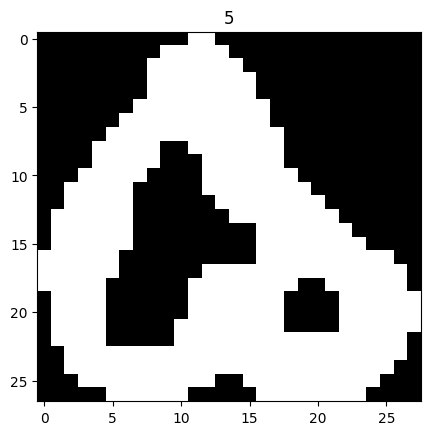

In [18]:
idx = 7
plt.imshow(x_train_original[idx], cmap= 'gray')
plt.title(y_train[idx]);

In [19]:
# resize 5by5
import cv2
x_train_5by5 = [cv2.resize(img, dsize= (5,5)) for img in x_train_original]
x_test_5by5 = [cv2.resize(img, dsize= (5,5)) for img in x_test_original]

In [24]:
x_train = np.reshape(x_train_5by5, [-1, 25])
x_test = np.reshape(x_test_5by5, [-1, 25])

In [27]:
x_train.shape


(1000, 25)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [29]:
knn.score(x_test, y_test)

0.96